In [67]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
from keras.models import Model
from keras import regularizers
import keras
import os
import tensorflow as tf
from keras.models import Sequential, load_model
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
%matplotlib inline

In [68]:
from keras.datasets import cifar10
(X_train,y_train),(X_test, y_test) = cifar10.load_data()


In [70]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

In [71]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [72]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                          horizontal_flip=True)


it_train = datagen.flow(X_train, y_train_one_hot, batch_size=64)

In [73]:
model=load_model('../input/mobilefiles/mobilec.h5')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128 

In [74]:
model.load_weights('../input/mobilefiles/mobilec.hdf5')

In [75]:
f=open('../input/mobilefiles/mobilechist.pckl','rb')
history  =  pickle.load(f)
f.close()

In [6]:
mobile = keras.applications.mobilenet.MobileNet(include_top=False,input_shape=(32,32,3))
        
mobile.summary()



/opt/conda/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________

In [29]:
#model is unchanged
x = mobile.layers[-4].output

x = Flatten()(x)
x=Dense(512, activation='relu')(x) 
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Dense(256, activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(256, activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(256, activation='relu')(x)
x=Dense(128, activation='relu')(x)
x=Dense(128, activation='relu')(x)
x=Dropout(0.5)(x)
prediction_layer = Dense(10, activation='sigmoid')(x) 
model = Model(inputs=mobile.input, outputs=prediction_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128 

In [76]:
model.compile(Adam(lr=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Evaluate by test data 

In [77]:
model.evaluate(X_test,y_test_one_hot)

10000/10000 [==============================] - 3s 338us/step


[0.47465314338207243, 0.859000027179718]

In [122]:
bst_val_score = max(history['val_accuracy'])
bst_val_score

0.8694999814033508

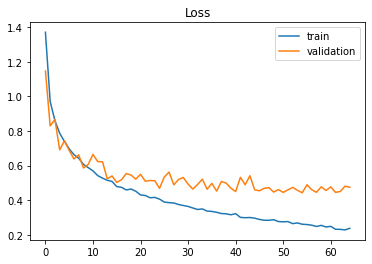

In [123]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.title('Loss')
plt.legend(['train', 'validation'])
plt.show()

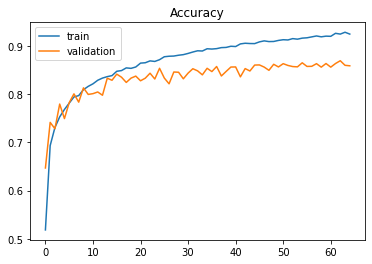

In [124]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

plt.title('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

## predict an input image

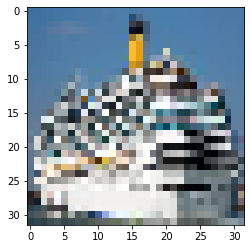

In [159]:
img_pred = image.load_img('../input/cifar10/air3.jpg', target_size=(32,32,3))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

In [160]:
#Get the probabilities

probabilities = model.predict(img_pred)
probabilities

array([[1.7323693e-02, 9.4986167e-03, 4.0491829e-03, 1.3419930e-02,
        2.0245006e-03, 1.5606871e-03, 2.4022781e-03, 3.0976473e-04,
        9.7923136e-01, 8.0902167e-03]], dtype=float32)

In [161]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

index = np.argsort(probabilities[0,:])
print('Most likely class :', class_name[index[9]] , ', Probability : ', probabilities[0 , index[9]])
print('Most second  likely class :', class_name[index[8]] , ', Probability : ', probabilities[0 , index[8]])
print('Most third  likely class :', class_name[index[7]] , ', Probability : ', probabilities[0 , index[7]])
print('Most fourth  likely class :', class_name[index[6]] , ', Probability : ', probabilities[0 , index[6]])
print('Most fifth  likely class :', class_name[index[5]] , ', Probability : ', probabilities[0 , index[5]])



Most likely class : ship , Probability :  0.97923136
Most second  likely class : airplane , Probability :  0.017323693
Most third  likely class : cat , Probability :  0.01341993
Most fourth  likely class : automobile , Probability :  0.009498617
Most fifth  likely class : truck , Probability :  0.008090217
